In [53]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

# Basics of Prediction Intervals



Confidence intervals convey the accuracy of an estimator, but sometimes we want the accuracy of a prediction for a future observation. For example, someone might say: half the time my bus arrives at most 3/4 of a minute late, but how bad might the wait get? As another example, the California Department of Fish and Game sets the minimum catch size for Dungeness crabs to 146 mm, and a recreational fishing company might wonder how much bigger than 146 mm their customer's catch might be when they bring them fishing. And as yet another example, a vet estimates the weight of a donkey to be 169 kg based on its length and girth and uses this estimate to administer medication. For the donkey's safety, the vet is keen to know how different the donkey's real weight might be from this estimate.  

What these examples have in common is an interest in the prediction of a future observation, and the desire to quantify how far that future observation might be from this prediction. We are also using the observed statistic (the estimator) as the prediction in all of these scenarios. In the following sections, we will work through these examples to provide additional information about the size of the variation of observations from the predicted value. 

## Example: Predicting Bus Wait Times 

{numref}`Chapter %s <ch:modeling>` models the lateness of a Seattle bus in arriving at a particular stop. We observed that the distribution was highly skewed and chose to estimate the typical lateness by the median, which was 0.74 minutes. We reproduce the sample histogram from that chapter here.

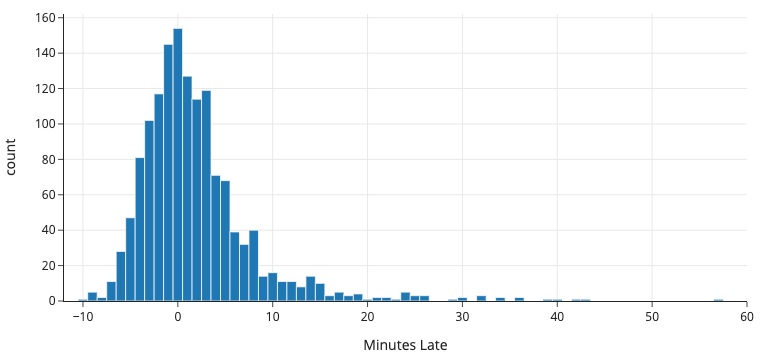

In [54]:
times = pd.read_csv('data/seattle_bus_times_NC.csv')
fig = px.histogram(times, x='minutes_late', width=350, height=250)
fig.update_xaxes(range=[-12, 60], title_text='Minutes Late')

The prediction problem addresses how late might the bus be tomorrow. While the median is informative, it doesn't provide information about the skewness of the distribution so from the median alone, we don't know how bad the wait might get. 
The 75th percentile, or even the 95th percentile, would add useful information to consider. We compute them here:

In [55]:
print(f"median:  {times['minutes_late'].median():.2f} mins late")
print(f"75th percentile:  {np.percentile(times['minutes_late'], 75.0, interpolation='lower'):.2f} mins late")
print(f"95th percentile:  {np.percentile(times['minutes_late'], 95.0, interpolation='lower'):.2f} mins late")

median:  0.74 mins late
75th percentile:  3.78 mins late
95th percentile:  13.02 mins late


From these statistics, we learn that while more than half the time the bus is not even a minute late, another quarter of the time it's less than four minutes late, but it's can easily happen that the bus is nearly a quarter of an hour late. These three values together help us make plans.

## Example: Predicting Crab Size

Fishing for Dungeness crabs is highly regulated, including limiting the size of caught crabs in recreational fishing to 146 mm. To better understand the population of Dungeness crabs, the California Department of Fish and Game worked with commercial crab fishers from northern California and southern Oregon to capture, measure, and release crabs. Below is a histogram of the size a crab's shell for the approximately 450 crabs caught.    

In [56]:
crabs = pd.read_csv('data/crabs.data', delimiter='\s+')
crab_shell = crabs['postsz'][crabs['postsz'] > 120]

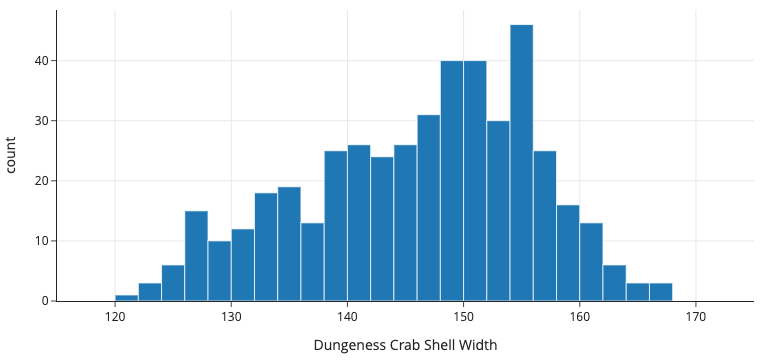

In [57]:
fig = px.histogram(x=crab_shell, width=350, height=250)
fig.update_xaxes(range=[115, 175], title_text='Dungeness Crab Shell Width')

We can summarize the distribution by the average shell size:

In [58]:
print(f"Average crab shell width: {np.mean(crab_shell):.0f} mm")

Average crab shell width: 146 mm


The average, 146 mm, is a good prediction for the typical size of crab. However, it lacks information about how far an individual crab may vary from the average. The standard deviation can fill in this gap:

In [59]:
print(f"Standard deviation of crabs shell width: {np.std(crab_shell):.0f} mm")

Standard deviation of crabs shell width: 10 mm


Now we see that the crabs routinely differ from the typical 146 mm by 10 to 20 mm. This information is helpful in developing policies around crab fishing to maintain the health of the crab population and to set expectations for the recreational fisher. 

## Example: Prediction the weight of a donkey

In {numref}`Chapter %s <ch:donkey>`, a model was 

It doesn't matter that the model is over parameterized. We are not interested in
the fitted coefficients


Nearly all (95%) of the actual weights are within 10% of the predicted weights

Healthy donkey over 5 years of age

$$predict\_weight ~=~ -175 ~+~ length ~+~ 2girth$$

length 101, girth 116  prediction is 